# wobble experiments

`wobble` is an awesome new [open source package](https://github.com/megbedell/wobble) to infer telluric and stellar spectra from multi-epoch astronomical spectroscopy.

In this notebook we take a first look at how it's used.

In [1]:
import wobble
import tensorflow
tensorflow.__version__

'1.12.0'

In [2]:
#wobble.__file__
#wobble.utils.<TAB>

It works!

### Get the data
I've uploaded the HDF5 file to a Kaggle dataset so it's available here.



In [3]:
data = wobble.Data('../data/51peg_e2ds.hdf5', orders=[30, 31, 32, 33, 34, 35])

In [4]:
results = wobble.Results(data=data)

In [5]:
#model = wobble.Model(data, results, 0)

Ordinarily, `wobble` will look for default initialization guides for the regularization parameters.  The code expects them in a hard-coded location, which is violated here on kaggle.com.  In the absence of these files, `wobble` uses metadata keywords that accompany the input data as a starting guide.  

It might be worth double checking if there is a `kwarg` to alter the location of these default files.

In [6]:
import time

In [7]:
%%capture
t0 = time.time()
results = wobble.Results(data=data)
for r in range(len(data.orders)):
        model = wobble.Model(data, results, r)
        model.add_star('star')
        model.add_telluric('tellurics')
        wobble.optimize_order(model)
        
t1 = time.time()

In [8]:
dtime = (t1 - t0) / 60.0
print("It took {:0.1f} minutes to run the model ".format(dtime))

It took 2.3 minutes to run the model 


Performance fun of 6 spectral orders:

|System | time (minutes)|
| -- | -- |
| Kaggle CPU| 4.1 |
| Kaggle failed GPY | 7.3 |
| Macbook Pro | 2.3 |

In [9]:
data.xs[0].shape

(91, 4096)

In [10]:
data.fluxes[0].shape

(91, 4096)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Let's explore the results, order by order!

In [12]:
r = 0

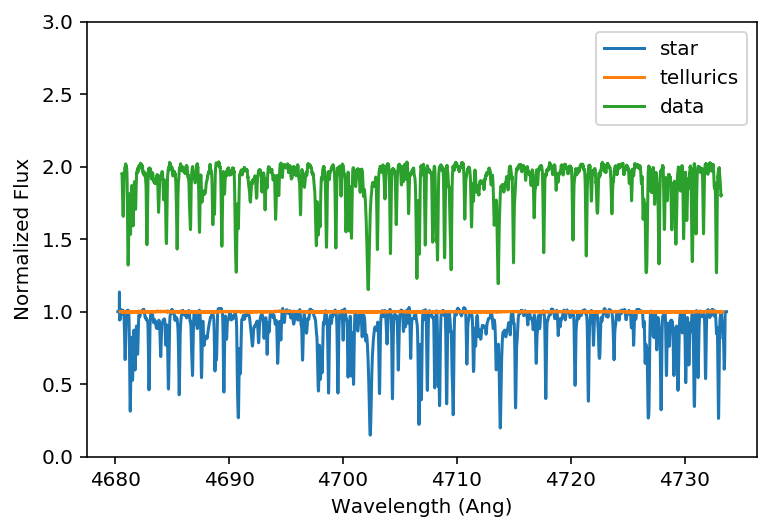

In [13]:
r+=1
plt.plot(np.exp(results.star_template_xs[r]), np.exp(results.star_template_ys[r]),
                 label='star')
plt.plot(np.exp(results.tellurics_template_xs[r]), np.exp(results.tellurics_template_ys[r]),
                label='tellurics')
plt.plot(np.exp(data.xs[r][0]), np.exp(data.ys[r][0])+1,
                label='data')
plt.xlabel('Wavelength (Ang)')
plt.ylabel('Normalized Flux')
plt.legend()
plt.ylim(0, 3)
plt.show()

Awesome!